In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
from tensorflow import keras



In [2]:
mnist = keras.datasets.mnist

In [3]:


(train_features, train_labels),(test_features, test_labels) = mnist.load_data()

In [4]:
x_test_flattened = test_features.reshape(test_features.shape[0], -1)
x_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
train_features.shape

(60000, 28, 28)

In [6]:
test_features.shape

(10000, 28, 28)

5


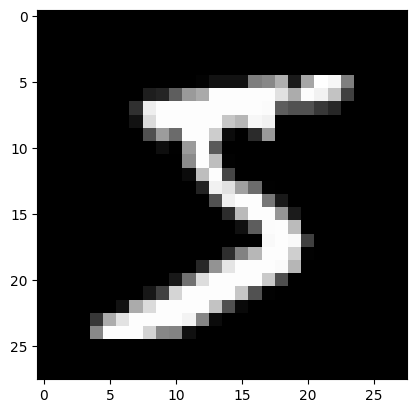

In [7]:
idx = 0
img = train_features[idx]

print(train_labels[idx])
plt.gray()
plt.imshow(img)

# PreProcessing

In [8]:
np.min(img), np.max(img)

(np.uint8(0), np.uint8(255))

In [9]:
train_features = train_features/255.0
test_features = test_features/255.0

In [10]:
test_features[0].shape

(28, 28)

# Model definition

In [11]:
#input_shape=(None,28,28)
#input_shape = (None, 28, 28)
#model.add(keras.layers.Input(shape=input_shape)) 
model = keras.Sequential()

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [12]:
model.compile(optimizer=tf.optimizers.Adam(), loss= tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist=model.fit(train_features, train_labels, epochs=1000, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.7511 - val_accuracy: 0.9443 - val_loss: 0.1897
Epoch 2/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1644 - val_accuracy: 0.9629 - val_loss: 0.1251
Epoch 3/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.1136 - val_accuracy: 0.9680 - val_loss: 0.1044
Epoch 4/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9746 - loss: 0.0871 - val_accuracy: 0.9721 - val_loss: 0.0888
Epoch 5/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0663 - val_accuracy: 0.9759 - val_loss: 0.0806
Epoch 6/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0536 - val_accuracy: 0.9761 - val_loss: 0.0790
Epoch 7/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0438 - val_accuracy: 0.9768 - val_loss: 0.0742
Epoch 8/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9894 - loss: 0.0356 - 

In [15]:
model.evaluate(test_features, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9790 - loss: 0.3248


[0.25674471259117126, 0.9825000166893005]

In [16]:
idx= 0
img = test_features[idx]
print(test_labels[idx])

7


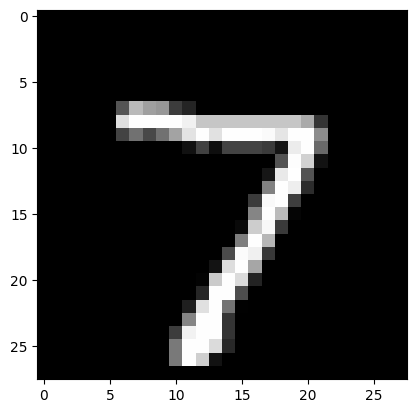

In [17]:
plt.gray()
plt.imshow(img)

In [26]:
# resize
test_data0 = np.reshape(img,(-1,28,28))

test_data0.shape

(1, 28, 28)

In [27]:

model.predict(test_data0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 8.827952e-34,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

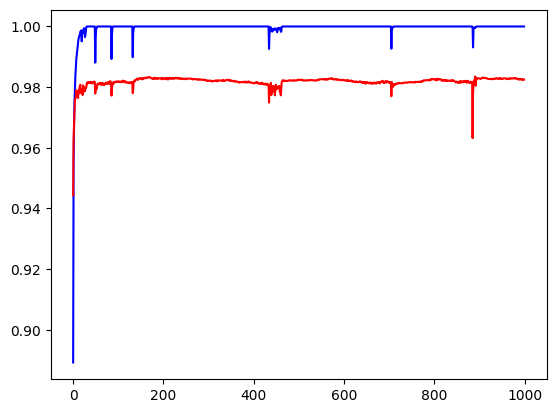

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')